In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### Train Dataframe

In [2]:
train_df = pd.read_csv('train.csv')
print(train_df.head())
print(train_df.info())
print(train_df.describe())
train_df['Year'] = train_df['Year'] - train_df['Year'].min() + 1
print(train_df.loc[train_df.Yield>5,:] )
train_df = train_df.loc[train_df.Yield<1000,:] 

   ID   District      Season  Year            Crop  AvgAirTemp  MinAirTemp  \
0   1  Ahmedabad      Kharif  2004     Castor seed   27.934641        15.7   
1   2       Tonk      Kharif  2007     Castor seed   29.460976        16.6   
2   3   Banswara  Whole year  2003          Potato   26.987945        12.6   
3   4   Banswara  Whole year  2003  Other oilseeds   26.987945        12.6   
4   5  Ahmedabad      Kharif  2007          Cotton   28.404575        17.7   

   MaxAirTemp  AvgTempSkew  AvgTempKurt    ...     AvgRelHumSkew  \
0        40.0     0.743458     0.950263    ...         -0.919108   
1        44.4     0.727877    -0.352631    ...         -0.342394   
2        43.8     0.416613    -0.075495    ...          0.588356   
3        43.8     0.416613    -0.075495    ...          0.588356   
4        40.4     0.619181     0.091038    ...         -1.185263   

   AvgRelHumKurt   AvgDewPt  AvgDewPtSkew  AvgDewPtKurt   AvgPrec  \
0      -0.126934  20.966667     -1.986990      3.3549

In [3]:
test_df = pd.read_csv('test.csv')
print(test_df.head())
print(test_df.info())
print(test_df.describe())

     ID    District      Season  Year       Crop  AvgAirTemp  MinAirTemp  \
0  2845        Tonk      Kharif  2008       Urad   28.139024        17.1   
1  2846   Ahmedabad      Kharif  2011       Urad   28.641176        12.5   
2  2847    Gulberga        Rabi  2005      Jowar   23.740496        11.6   
3  2848  Coimbatore  Whole year  1999  Coriander   25.287637        14.6   
4  2849       Jalna        Rabi  2000  Sunflower   26.304887        11.2   

   MaxAirTemp  AvgTempSkew  AvgTempKurt  AvgRelHum  AvgRelHumSkew  \
0        43.8     1.563502     1.730665  67.098374      -0.859024   
1        44.0     1.769485     3.659071  76.147712      -0.689176   
2        34.8    -0.015088     1.298610  51.059504       0.823141   
3        37.4     0.719549     0.495518  63.481044      -0.555744   
4        43.2     0.509802     0.086797  44.813264       0.792182   

   AvgRelHumKurt   AvgDewPt  AvgDewPtSkew  AvgDewPtKurt   AvgPrec  \
0      -0.625348  20.380488     -1.336808      0.405500    

In [4]:
train_df.loc[:'ID','District']

0        Ahmedabad
1             Tonk
2         Banswara
3         Banswara
4        Ahmedabad
5         Banswara
6         Banswara
7         Gulberga
8        Bhagalpur
9         Banglore
10        Gulberga
11        Banglore
12          Indore
13          Jaipur
14       Bhagalpur
15         Dharwad
16        Banglore
17        Gulberga
18        Gulberga
19      Coimbatore
20          Indore
21           Jalna
22          Jaipur
23       Ahmedabad
24          Jaipur
25        Gulberga
26      Coimbatore
27        Banswara
28        Gulberga
29           Hisar
           ...    
2814         Jalna
2815      Gulberga
2816      Banglore
2817         Jalna
2818      Banglore
2819         Hisar
2820      Banswara
2821        Rewari
2822    Coimbatore
2823      Gulberga
2824          Tonk
2825         Hisar
2826      Banglore
2827        Jaipur
2828         Jalna
2829        Indore
2830    Coimbatore
2831         Hisar
2832    Coimbatore
2833    Coimbatore
2834      Banglore
2835     Bha

In [5]:
print(pd.crosstab(train_df['Crop'],train_df['Season']).sort_index())
print("\n")
print(pd.crosstab(test_df['Crop'],test_df['Season']).sort_index())
print("\n")
print(train_df['Crop'].value_counts().sort_index())

Season                 Kharif  Rabi  Summer  Whole year
Crop                                                   
Arecanut                    0     0       0          19
Arhar/tur                 123     0       0           6
Bajra                     102     0       1           2
Banana                      0     0       0          33
Barley                      0    47       0           0
Black pepper                0     0       0          17
Cardamom                    0     0       0           7
Cashewnut                   0     0       0          12
Castor seed                77     0       0           2
Coriander                   0     0       0          44
Cotton                     63     0       0          12
Cowpea                      1     1       0           0
Dry chillies               14     5       3          65
Garlic                      0     0       0          51
Ginger                     11     0       0          14
Gram                        3   106       0     

In [6]:
train_df.corr()

ID      Year  AvgAirTemp  MinAirTemp  MaxAirTemp  \
ID             1.000000  0.014880   -0.020678    0.019711   -0.031276   
Year           0.014880  1.000000    0.004447    0.048305    0.088113   
AvgAirTemp    -0.020678  0.004447    1.000000    0.492048    0.376727   
MinAirTemp     0.019711  0.048305    0.492048    1.000000   -0.526269   
MaxAirTemp    -0.031276  0.088113    0.376727   -0.526269    1.000000   
AvgTempSkew   -0.007988 -0.017971    0.233198    0.395142    0.005783   
AvgTempKurt   -0.002824  0.018640    0.180816    0.332085   -0.109953   
AvgRelHum      0.015893  0.115366    0.010009    0.429402   -0.394432   
AvgRelHumSkew  0.014474 -0.083266   -0.026732   -0.263689    0.170106   
AvgRelHumKurt  0.002027 -0.006479   -0.072465    0.179896   -0.256963   
AvgDewPt       0.001467  0.081369    0.638591    0.643598   -0.076303   
AvgDewPtSkew   0.001026  0.083521   -0.332496   -0.335359    0.010332   
AvgDewPtKurt   0.007351 -0.151041    0.103088    0.294723   -0.175327   
AvgPrec        0.001117  0.072770   -0.038060    0.448949   -0.371463   
AvgPrecSkew   -0.027483 -0.018418   -0.181984   -0.203885    0.138588   
AvgPrecKurt    0.010251 -0.076783    0.036175   -0.070517    0.134482   
AvgWind        0.013897  0.248894    0.189309    0.648093   -0.369744   
Yield         -0.019393  0.013273    0.003254   -0.051709    0.046577   

               AvgTempSkew  AvgTempKurt  AvgRelHum  AvgRelHumSkew  \
ID               -0.007988    -0.002824   0.015893       0.014474   
Year             -0.017971     0.018640   0.115366      -0.083266   
AvgAirTemp        0.233198     0.180816   0.010009      -0.026732   
MinAirTemp        0.395142     0.332085   0.429402      -0.263689   
MaxAirTemp        0.005783    -0.109953  -0.394432       0.170106   
AvgTempSkew       1.000000     0.670443   0.360652      -0.457436   
AvgTempKurt       0.670443     1.000000   0.421330      -0.493672   
AvgRelHum         0.360652     0.421330   1.000000      -0.796433   
AvgRelHumSkew    -0.457436    -0.493672  -0.796433       1.000000   
AvgRelHumKurt     0.168395     0.417518   0.176991      -0.238805   
AvgDewPt          0.418978     0.430957   0.770993      -0.615293   
AvgDewPtSkew     -0.496008    -0.488041  -0.596673       0.702048   
AvgDewPtKurt      0.415990     0.460553   0.429069      -0.466187   
AvgPrec           0.402443     0.298889   0.732376      -0.533556   
AvgPrecSkew      -0.045248    -0.103080  -0.313868       0.040991   
AvgPrecKurt      -0.093031    -0.032145  -0.056697       0.058548   
AvgWind           0.231358     0.131001   0.512717      -0.311271   
Yield            -0.086549    -0.028947  -0.013923       0.007677   

               AvgRelHumKurt  AvgDewPt  AvgDewPtSkew  AvgDewPtKurt   AvgPrec  \
ID                  0.002027  0.001467      0.001026      0.007351  0.001117   
Year               -0.006479  0.081369      0.083521     -0.151041  0.072770   
AvgAirTemp         -0.072465  0.638591     -0.332496      0.103088 -0.038060   
MinAirTemp          0.179896  0.643598     -0.335359      0.294723  0.448949   
MaxAirTemp         -0.256963 -0.076303      0.010332     -0.175327 -0.371463   
AvgTempSkew         0.168395  0.418978     -0.496008      0.415990  0.402443   
AvgTempKurt         0.417518  0.430957     -0.488041      0.460553  0.298889   
AvgRelHum           0.176991  0.770993     -0.596673      0.429069  0.732376   
AvgRelHumSkew      -0.238805 -0.615293      0.702048     -0.466187 -0.533556   
AvgRelHumKurt       1.000000  0.061287     -0.196818      0.476073  0.160081   
AvgDewPt            0.061287  1.000000     -0.674574      0.394923  0.663607   
AvgDewPtSkew       -0.196818 -0.674574      1.000000     -0.784420 -0.492307   
AvgDewPtKurt        0.476073  0.394923     -0.784420      1.000000  0.463798   
AvgPrec             0.160081  0.663607     -0.492307      0.463798  1.000000   
AvgPrecSkew         0.020546 -0.394822      0.272986     -0.186148 -0.324571   
AvgPrecKurt        -0.018282 -0.021885   

### Scatter plot matrix

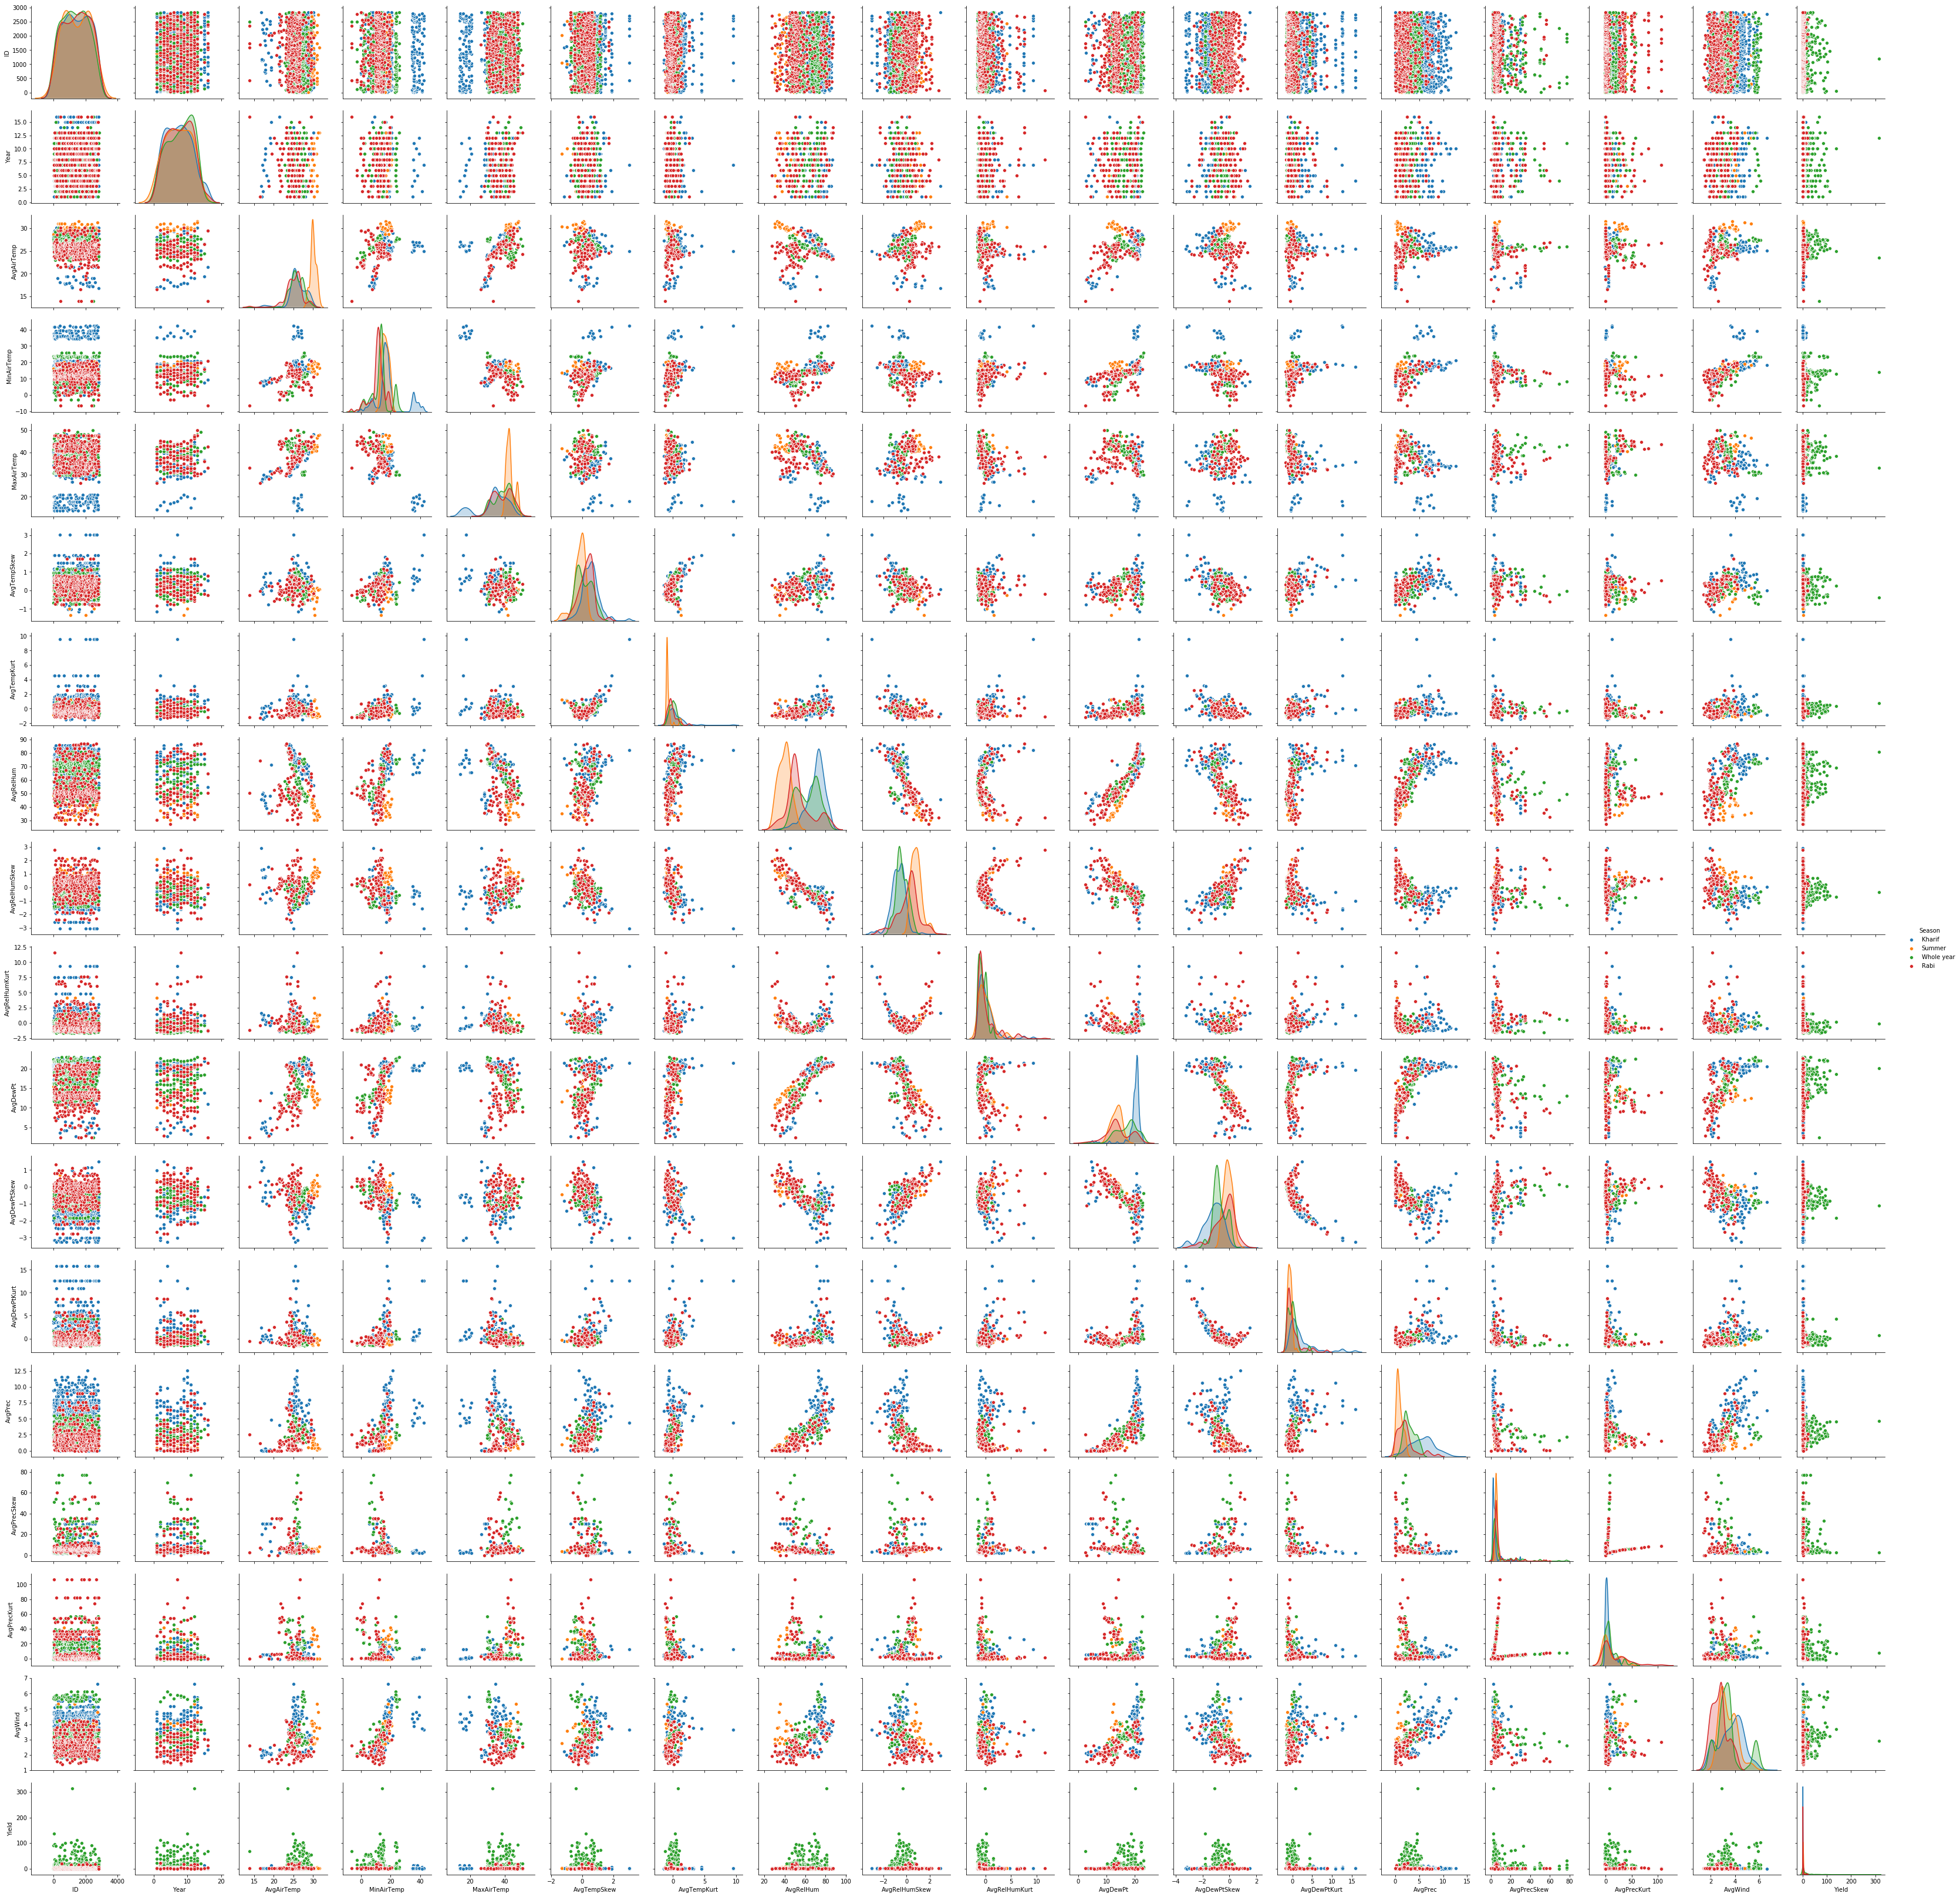

In [7]:
scatter_df = train_df.dropna()
sns.pairplot(scatter_df,hue='Season')

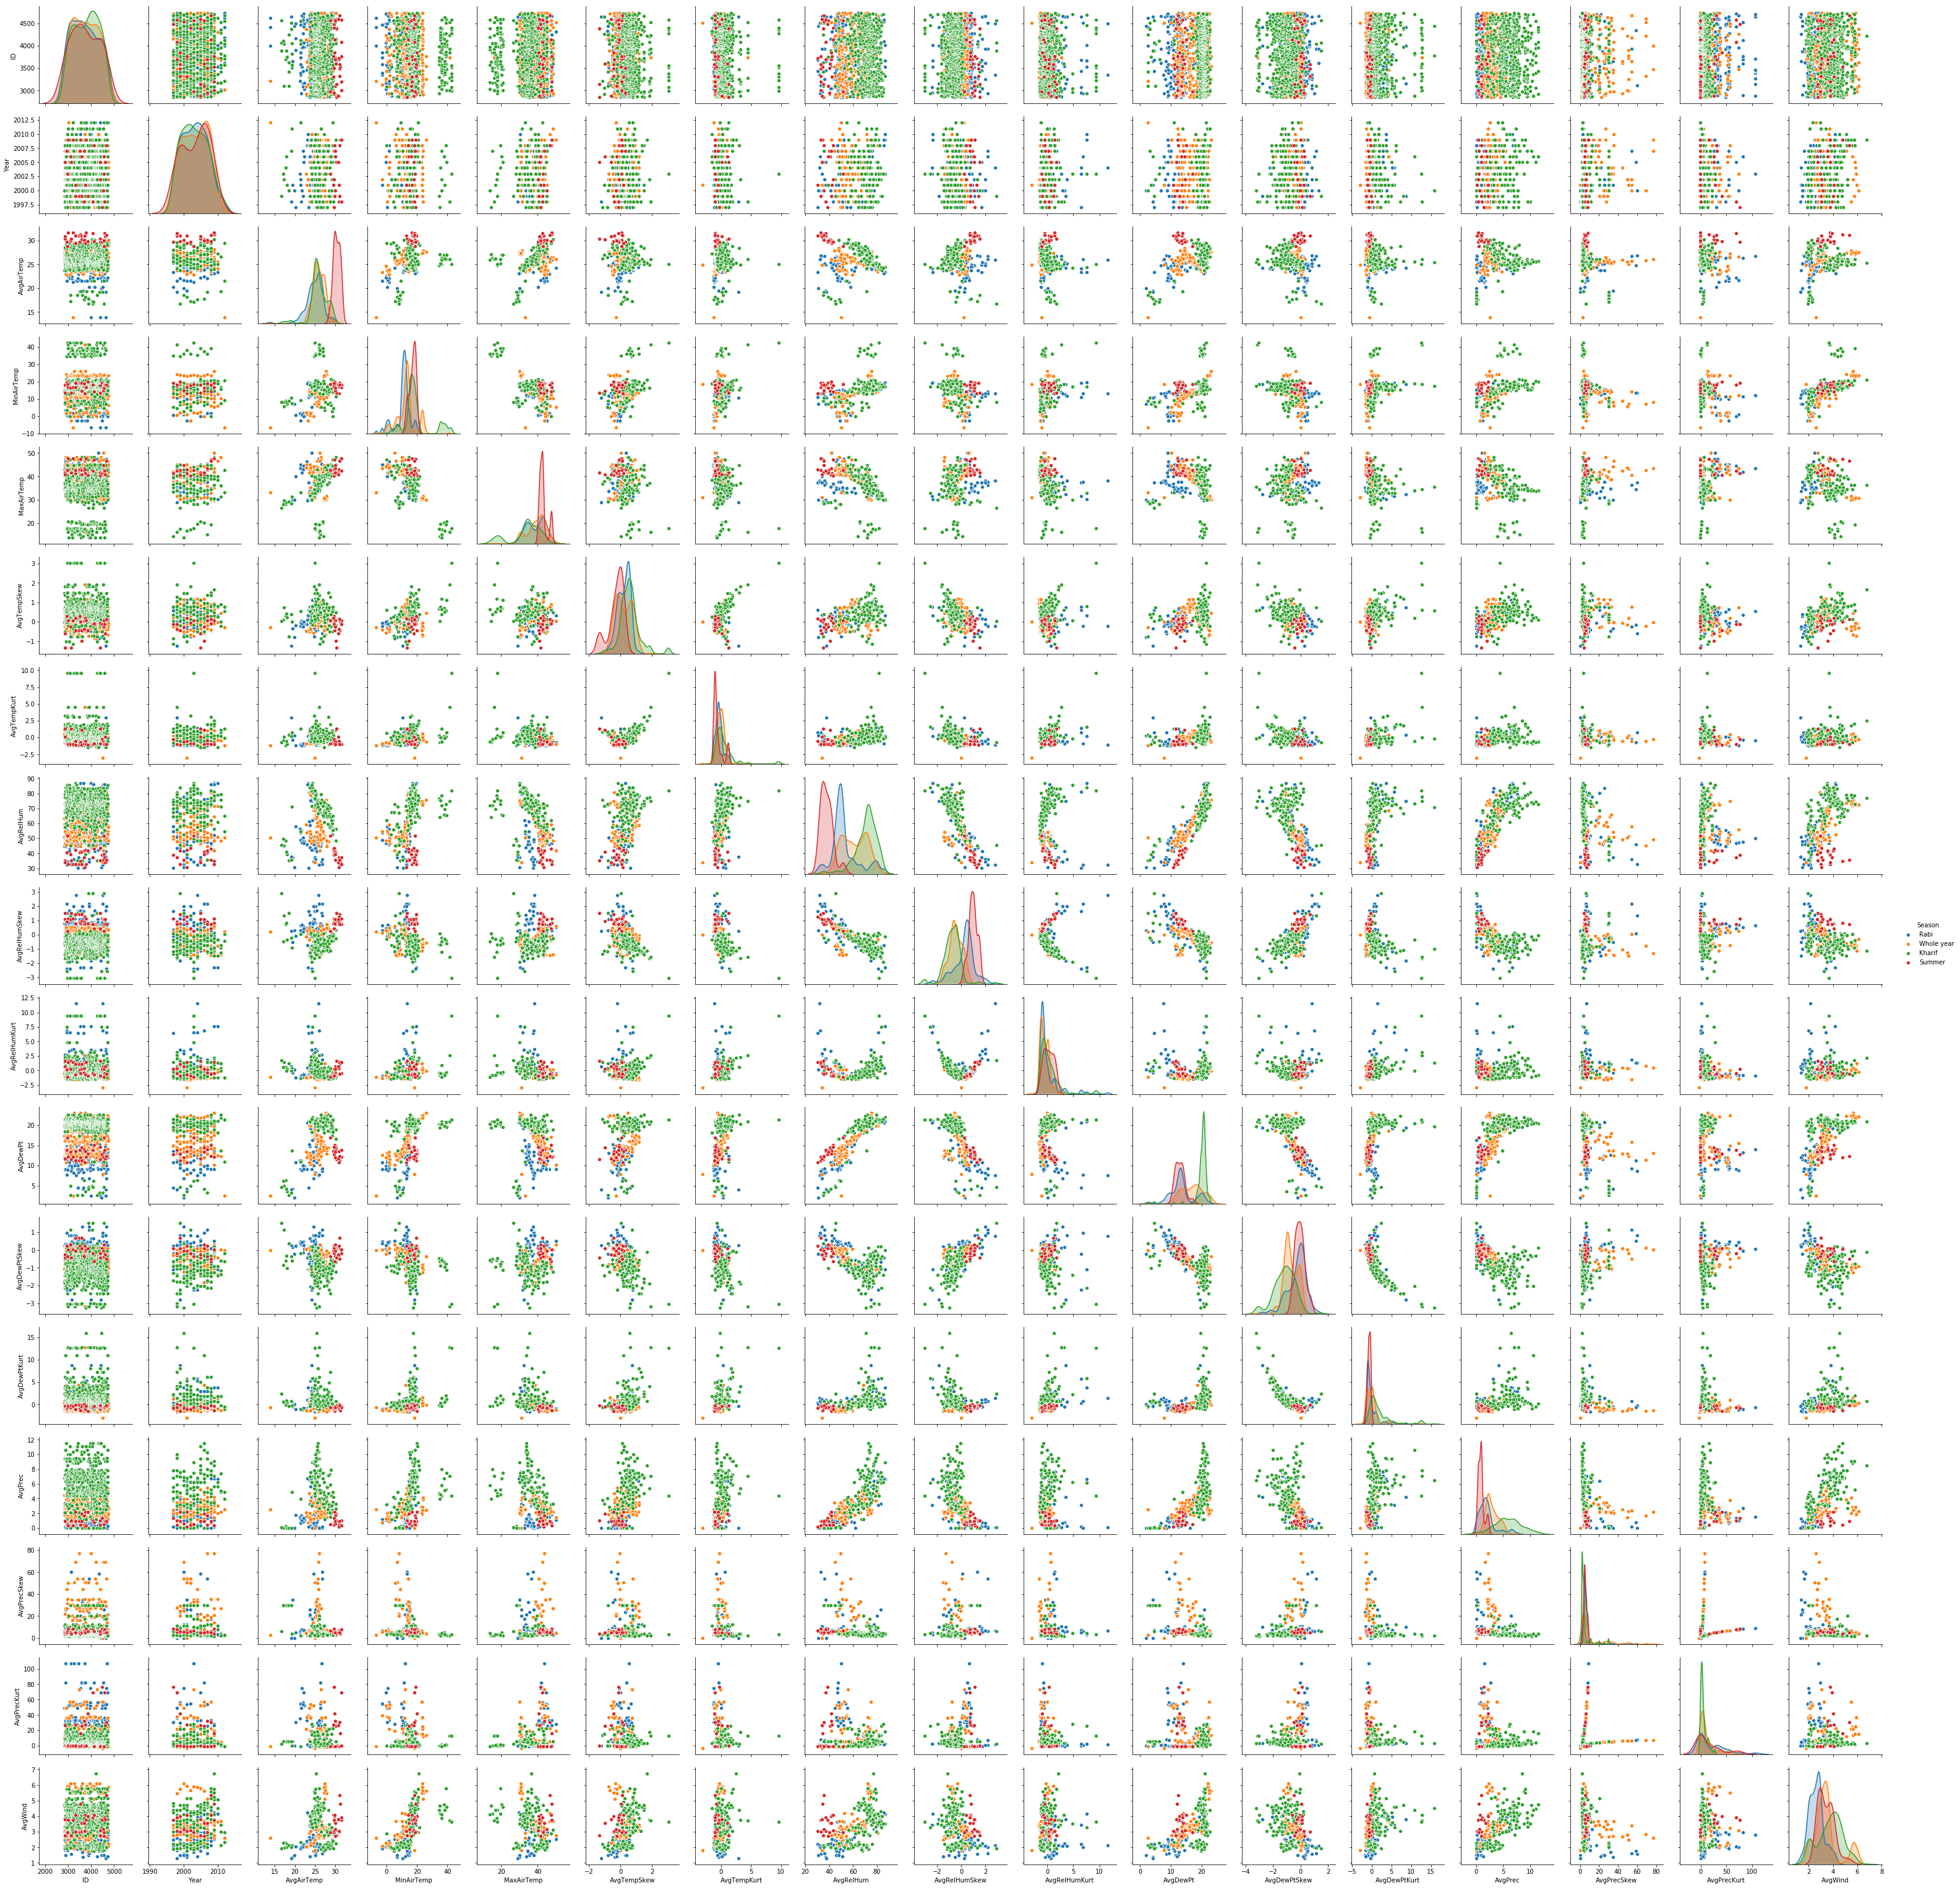

In [8]:
scatter_df = test_df.dropna()
sns.pairplot(scatter_df,hue='Season')

In [9]:
from sklearn.preprocessing import LabelEncoder,Imputer,RobustScaler
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
fill_df = train_df.select_dtypes('float') 
fill_df = imp.fit_transform(fill_df)

train_df[train_df.select_dtypes('float').columns] = fill_df

fill_df = test_df.select_dtypes('float') 
fill_df = imp.fit_transform(fill_df)

test_df[test_df.select_dtypes('float').columns] = fill_df



In [10]:
# for i in train_df.select_dtypes('float'):
#     train_df[str(i)] = np.log10(train_df[str(i)]+2)

In [11]:
def mae(true,test):
    ans = np.abs(true-test)
    print(ans.mean())

### Model Building

In [12]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from xgboost import plot_importance
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import AdaBoostRegressor
from imblearn.over_sampling import SMOTE
from deepreplay.callbacks import ReplayData

Using TensorFlow backend.


In [13]:
scaler = RobustScaler()
X = train_df.drop(['ID','Yield'],axis=1)
print(X.info())
le = LabelEncoder()
cat_df = X.select_dtypes('object')
for i in cat_df.columns:
    X[str(i)] = le.fit_transform(X[str(i)])
# X = pd.get_dummies(X)

# X = scaler.fit_transform(X)
target = train_df['Yield']
print(X.info())
# X = X.drop(['Yield'],axis=1)
X_train,X_test,Y_train,Y_test= train_test_split(X,target,test)
# criteria = ['mse','mae']
# splitter_val = ['best','random']
# min_samples_split = [2, 5, 10,15,20,25,30]
# min_samples_leaf = [1, 2, 4, 8, 16, 32, 64]
# max_features_val = ['auto','sqrt','log2']
# presort_val = [True,False]
# n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# reg = RandomForestRegressor()
# rs_reg = RandomizedSearchCV(reg,random_grid, n_iter = 10, cv = 4,verbose=2,scoring='neg_mean_absolute_error')
# rs_reg.fit(X_train,Y_train)
# print(rs_reg.best_score_)
# # reg.fit(X_train,Y_train)
# pred = rs_reg.predict(X_test)

# print(mean_absolute_error(Y_test,pred))
# # reg = RandomForestRegressor()
# reg = LinearSVR()
reg = RandomForestRegressor(n_estimators=100,min_samples_leaf=4,min_samples_split=10,max_depth=None,bootstrap=True)
# reg = AdaBoostRegressor()
reg.fit(X_train,Y_train)
pred = reg.predict(X_test)
print(mean_absolute_error(Y_test,pred))
# mae(Y_test,pred)
# # feature_imp = dict(zip(reg.feature_importances_.tolist(),X_train.columns.tolist()))
# # print(feature_imp)
# # count=0 
# # for key in sorted(feature_imp.keys()): 
# #     print(str(count)+ " " + str(key) + ":" + feature_imp[key])
# #     count+=1

# 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2843 entries, 0 to 2843
Data columns (total 19 columns):
District         2843 non-null object
Season           2843 non-null object
Year             2843 non-null int64
Crop             2843 non-null object
AvgAirTemp       2843 non-null float64
MinAirTemp       2843 non-null float64
MaxAirTemp       2843 non-null float64
AvgTempSkew      2843 non-null float64
AvgTempKurt      2843 non-null float64
AvgRelHum        2843 non-null float64
AvgRelHumSkew    2843 non-null float64
AvgRelHumKurt    2843 non-null float64
AvgDewPt         2843 non-null float64
AvgDewPtSkew     2843 non-null float64
AvgDewPtKurt     2843 non-null float64
AvgPrec          2843 non-null float64
AvgPrecSkew      2843 non-null float64
AvgPrecKurt      2843 non-null float64
AvgWind          2843 non-null float64
dtypes: float64(15), int64(1), object(3)
memory usage: 524.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2843 entries, 0 to 2843
Data columns 

NameError: name 'X_train' is not defined

In [ ]:
scaler = RobustScaler()
X = train_df.drop(['Yield','ID'],axis=1)
print(X.info())
le = LabelEncoder()
cat_df = X.select_dtypes('object')
for i in cat_df.columns:
    X[str(i)] = le.fit_transform(X[str(i)])
# X = pd.get_dummies(X)
X = scaler.fit_transform(X)
target = train_df['Yield']

# X = X.drop(['Yield'],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(X,target,test_size=0.20)
params = {'min_child_weight':[4,5,6,7,8], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}


reg = xgb.XGBRegressor()
rs_reg = RandomizedSearchCV(reg, param_distributions=params, n_iter=10, scoring='neg_mean_absolute_error', n_jobs=4, cv=5, verbose=3, random_state=1001)
rs_reg.fit(X_train,Y_train)
print(rs_reg.best_score_)
print(rs_reg.best_params_)
# reg.fit(X_train,Y_train)
pred = rs_reg.predict(X_test)
print(mean_absolute_error(Y_test,pred))

In [ ]:
scaler = RobustScaler()
X_train = train_df.drop(['ID','Yield'],axis=1)
X_test = test_df.drop(['ID'],axis=1)
id_col = test_df['ID']
le = LabelEncoder()
cat_df = X_train.select_dtypes('object')
for i in cat_df.columns:
    le.fit(X_train[str(i)])
    X_train[str(i)] = le.transform(X_train[str(i)])
    X_test[str(i)] = le.transform(X_test[str(i)])

    
X_train = scaler.fit_transform(X_train)
Y_train = train_df['Yield']

X_test = scaler.fit_transform(X_test)
reg = RandomForestRegressor(n_estimators=100,min_samples_leaf=4,min_samples_split=10,max_depth=None,bootstrap=True)
# reg = xgb.XGBRegressor(subsample=1.0,min_child_weight=6,max_depth=4,gamma=0.5,colsample_bytree=0.8)
reg.fit(X_train,Y_train)
pred = reg.predict(X_test)



In [ ]:
final = {'ID':id_col,
        'Yield':pred}
final_df = pd.DataFrame(final)
print(final_df.info())



In [ ]:
final_df.to_csv('submission.csv',index=False)